## CNN's For Portfolio Project


In [1]:
import tensorflow as tf 
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import cv2 as cv
from sklearn.model_selection import train_test_split

batch_size = 10
model_names = ['cor_cnn.hdf5','tra_cnn.hdf5','sag_cnn.hdf5']
image_dirs = ['Data/MRI/coronal','Data/MRI/transverse','Data/MRI/sagittal']
checkpoint_dirs = []
cp_callbacks = []

for name in model_names:
    checkpoint_dirs.append(os.path.join(os.getcwd(),"models",name))

for direc in checkpoint_dirs:
    cp_callbacks.append(tf.keras.callbacks.ModelCheckpoint(filepath=direc, monitor="val_accuracy", save_weights_only=False, verbose=0, save_freq='epoch', save_best_only=True))

oasis_df = pd.read_csv("Data/oasis_filtered.csv")

### Model Definitions

In [2]:
# CORONAL MODEL
# cor_model = tf.keras.models.Sequential([
#     tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(176,176,3)),
#     tf.keras.layers.MaxPooling2D((2,2)),
#     tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
#     tf.keras.layers.MaxPooling2D((2,2)),
#     tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
#     tf.keras.layers.Flatten(),
#     tf.keras.layers.Dense(64, activation='relu'),
#     tf.keras.layers.Dense(5, activation='softmax'),
# ])

cor_model = tf.keras.models.Sequential([
    tf.keras.layers.InputLayer(input_shape=(176,176,3)),
    tf.keras.layers.Conv2D(64, (5,5), activation='relu'),
    tf.keras.layers.MaxPooling2D((3,3)),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(.1),
    tf.keras.layers.Dense(32),
    tf.keras.layers.Dense(5, activation='softmax'),
])

cor_model.summary()
cor_model.compile(optimizer='adam',loss=tf.keras.losses.CategoricalCrossentropy(from_logits=False), metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 172, 172, 64)      4864      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 57, 57, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 55, 55, 32)        18464     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 27, 27, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 25, 25, 32)        9248      
_________________________________________________________________
flatten (Flatten)            (None, 20000)             0         
_________________________________________________________________
dropout (Dropout)            (None, 20000)             0

2021-11-02 15:57:54.290367: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [12]:
# TRANSVERSE MODEL
# tra_model = tf.keras.models.Sequential([
#     tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(208,176,3)),
#     tf.keras.layers.MaxPooling2D((2,2)),
#     tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
#     tf.keras.layers.MaxPooling2D((2,2)),
#     tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
#     tf.keras.layers.Flatten(),
#     tf.keras.layers.Dense(64, activation='relu'),
#     tf.keras.layers.Dense(5)
# ])

tra_model = tf.keras.models.Sequential([
    tf.keras.layers.InputLayer(input_shape=(208,176,3)),
    tf.keras.layers.Conv2D(64, (5,5), activation='relu'),
    tf.keras.layers.MaxPooling2D((3,3)),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(.1),
    tf.keras.layers.Dense(32),
    tf.keras.layers.Dense(5, activation='softmax'),
])

tra_model.summary()
tra_model.compile(optimizer='adam',loss=tf.keras.losses.CategoricalCrossentropy(from_logits=False), metrics=['accuracy'])

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_15 (Conv2D)           (None, 204, 172, 64)      4864      
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 68, 57, 64)        0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 66, 55, 32)        18464     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 33, 27, 32)        0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 31, 25, 32)        9248      
_________________________________________________________________
flatten_5 (Flatten)          (None, 24800)             0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 24800)            

In [11]:
# SAGITTAL MODEL
# sag_model = tf.keras.models.Sequential([
#     tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(176,208,3)),
#     tf.keras.layers.MaxPooling2D((2,2)),
#     tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
#     tf.keras.layers.MaxPooling2D((2,2)),
#     tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
#     tf.keras.layers.Flatten(),
#     tf.keras.layers.Dense(64, activation='relu'),
#     tf.keras.layers.Dense(5)
# ])

sag_model = tf.keras.models.Sequential([
    tf.keras.layers.InputLayer(input_shape=(176,208,3)),
    tf.keras.layers.Conv2D(64, (5,5), activation='relu'),
    tf.keras.layers.MaxPooling2D((3,3)),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(.1),
    tf.keras.layers.Dense(32),
    tf.keras.layers.Dense(5, activation='softmax'),
])

sag_model.summary()
sag_model.compile(optimizer='adam',loss=tf.keras.losses.CategoricalCrossentropy(from_logits=False), metrics=['accuracy'])

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 172, 204, 64)      4864      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 57, 68, 64)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 55, 66, 32)        18464     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 27, 33, 32)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 25, 31, 32)        9248      
_________________________________________________________________
flatten_3 (Flatten)          (None, 24800)             0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 24800)            

### DATA LOADING

In [2]:
def load_images_and_labels(path):
    oasis_df = pd.read_csv("Data/oasis_filtered.csv")
    oasis_df.set_index(['ID'], inplace=True)
    images = []
    labels = []
    for file in os.listdir(path):
        if file != '.DS_Store':
            img = cv.imread(os.path.join(path,file))
            subject_id = file[:13]
            label = oasis_df.loc[subject_id,'CDR']

            if label == 0:
                label = 0.0
            elif label == 0.5:
                label = 1.0
            elif label == 1:
                label = 2.0
            elif label == 2:
                label = 3.0
            elif label == 3:
                label = 4.0

            # Normalize image values
            img = img / 255
            images.append(img)
            labels.append(label)

            if img is None:
                print("AHHH")

    print(len(images))
    return np.array(images),np.array(labels)


In [3]:
def plot_metrics(history, model):
    plt.plot(history.history['accuracy'], label='accuracy')
    plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.ylim([0.5, 1])
    plt.legend(loc='lower right')

    test_loss, test_acc = model.evaluate(x_test,  y_test, verbose=2)
    print("Test Loss: ",test_loss)
    print("Test Accuracy: ",test_acc)

## TRAIN CORONAL MODEL

211


2021-11-02 15:58:26.304422: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/50
6/6 [==============================] - 3s 398ms/step - loss: 1.2188 - accuracy: 0.5476 - val_loss: 0.9619 - val_accuracy: 0.5814
Epoch 2/50
6/6 [==============================] - 2s 376ms/step - loss: 1.0387 - accuracy: 0.5774 - val_loss: 1.0105 - val_accuracy: 0.4651
Epoch 3/50
6/6 [==============================] - 2s 375ms/step - loss: 1.0105 - accuracy: 0.5536 - val_loss: 0.9122 - val_accuracy: 0.6279
Epoch 4/50
6/6 [==============================] - 2s 367ms/step - loss: 0.9650 - accuracy: 0.6071 - val_loss: 0.9595 - val_accuracy: 0.5814
Epoch 5/50
6/6 [==============================] - 2s 377ms/step - loss: 0.9323 - accuracy: 0.6012 - val_loss: 0.9301 - val_accuracy: 0.6512
Epoch 6/50
6/6 [==============================] - 2s 379ms/step - loss: 0.8974 - accuracy: 0.6369 - val_loss: 0.9010 - val_accuracy: 0.5814
Epoch 7/50
6/6 [==============================] - 2s 396ms/step - loss: 0.8402 - accuracy: 0.6369 - val_loss: 0.8613 - val_accuracy: 0.6279
Epoch 8/50
6/6 [====

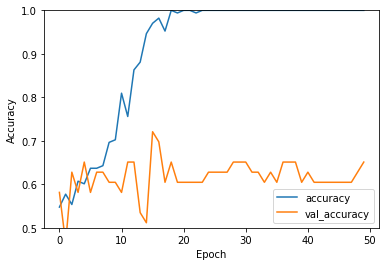

In [7]:
images,labels = load_images_and_labels(image_dirs[0])

x_train, x_test, y_train, y_test = train_test_split(images,labels,test_size=0.2,stratify=labels)
y_train = tf.keras.utils.to_categorical(y_train,num_classes=5)
y_test = tf.keras.utils.to_categorical(y_test,num_classes=5)

history = cor_model.fit(x_train, y_train, epochs=30, validation_data=(x_test,y_test),callbacks=[cp_callbacks[0]])

plot_metrics(history, cor_model)

In [ ]:
cor_model = tf.keras.models.load_model("models/cor_cnn.hdf5")

images,labels = load_images_and_labels(image_dirs[0])

x_train, x_test, y_train, y_test = train_test_split(images,labels,test_size=0.2,stratify=labels)
y_train = tf.keras.utils.to_categorical(y_train,num_classes=5)
y_test = tf.keras.utils.to_categorical(y_test,num_classes=5)

pred = cor_model.predict(np.array([x_train[0]]))

## TRAIN TRANSVERSE MODEL

211
Epoch 1/30
6/6 [==============================] - 3s 437ms/step - loss: 0.8244 - accuracy: 0.8750 - val_loss: 0.7007 - val_accuracy: 0.7209
Epoch 2/30
6/6 [==============================] - 3s 467ms/step - loss: 0.7489 - accuracy: 0.7202 - val_loss: 0.3090 - val_accuracy: 0.8140
Epoch 3/30
6/6 [==============================] - 3s 445ms/step - loss: 0.3387 - accuracy: 0.9107 - val_loss: 0.4598 - val_accuracy: 0.7674
Epoch 4/30
6/6 [==============================] - 3s 441ms/step - loss: 0.3203 - accuracy: 0.8750 - val_loss: 0.2072 - val_accuracy: 0.9070
Epoch 5/30
6/6 [==============================] - 3s 470ms/step - loss: 0.2389 - accuracy: 0.9345 - val_loss: 0.1729 - val_accuracy: 0.9767
Epoch 6/30
6/6 [==============================] - 3s 426ms/step - loss: 0.2180 - accuracy: 0.9286 - val_loss: 0.3069 - val_accuracy: 0.8837
Epoch 7/30
6/6 [==============================] - 3s 429ms/step - loss: 0.1445 - accuracy: 0.9940 - val_loss: 0.2207 - val_accuracy: 0.9302
Epoch 8/30
6/6 [

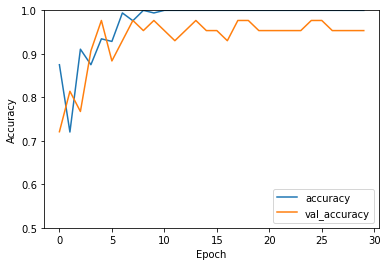

In [14]:
images,labels = load_images_and_labels(image_dirs[1])

x_train, x_test, y_train, y_test = train_test_split(images,labels,test_size=0.2,stratify=labels)
y_train = tf.keras.utils.to_categorical(y_train,num_classes=5)
y_test = tf.keras.utils.to_categorical(y_test,num_classes=5)

history = tra_model.fit(x_train, y_train, epochs=30, validation_data=(x_test,y_test),callbacks=[cp_callbacks[1]])

plot_metrics(history, tra_model)


## TRAIN SAGITTAL MODEL

211
Epoch 1/30
6/6 [==============================] - 3s 503ms/step - loss: 1.2229 - accuracy: 0.4940 - val_loss: 1.0379 - val_accuracy: 0.5814
Epoch 2/30
6/6 [==============================] - 3s 479ms/step - loss: 1.0415 - accuracy: 0.5774 - val_loss: 0.9784 - val_accuracy: 0.5814
Epoch 3/30
6/6 [==============================] - 3s 469ms/step - loss: 0.9735 - accuracy: 0.5952 - val_loss: 0.9583 - val_accuracy: 0.5814
Epoch 4/30
6/6 [==============================] - 3s 463ms/step - loss: 0.9328 - accuracy: 0.6131 - val_loss: 0.9164 - val_accuracy: 0.5814
Epoch 5/30
6/6 [==============================] - 3s 471ms/step - loss: 0.9030 - accuracy: 0.6012 - val_loss: 0.9554 - val_accuracy: 0.6047
Epoch 6/30
6/6 [==============================] - 3s 480ms/step - loss: 0.8799 - accuracy: 0.6607 - val_loss: 0.8972 - val_accuracy: 0.6047
Epoch 7/30
6/6 [==============================] - 3s 482ms/step - loss: 0.8736 - accuracy: 0.6607 - val_loss: 0.9127 - val_accuracy: 0.5814
Epoch 8/30
6/6 [

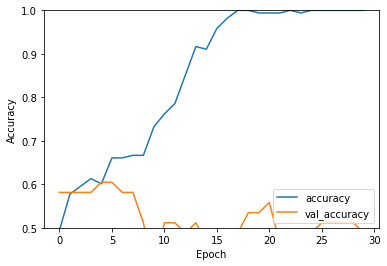

In [12]:
images,labels = load_images_and_labels(image_dirs[2])

x_train, x_test, y_train, y_test = train_test_split(images,labels,test_size=0.2,stratify=labels)
y_train = tf.keras.utils.to_categorical(y_train,num_classes=5)
y_test = tf.keras.utils.to_categorical(y_test,num_classes=5)

history = sag_model.fit(x_train, y_train, epochs=30, validation_data=(x_test,y_test),callbacks=[cp_callbacks[2]])

plot_metrics(history, sag_model)